<a href="https://colab.research.google.com/github/da03/cs187-sections/blob/master/section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Scientific Computing in PyTorch

In [ ]:
%matplotlib inline
import torch
from matplotlib import pyplot as plt

## Tensors

## Regression Example

We begin with a 1-d linear regression toy example, where we generate data points by sampling from a line and adding noise.

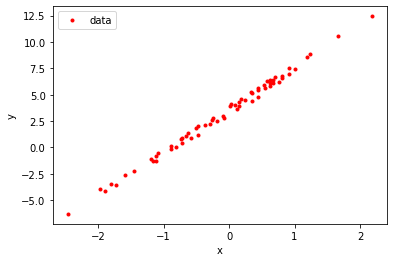

In [ ]:
N = 64
a = 3
b = 4

x = torch.randn(N)
noise = torch.rand(N)

y = a + b*x + noise

plt.plot(x,y, 'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data',])

We specify a linear model with two parameters `alpha` and `beta`: ```y_pred = alpha + beta * x```. We intialize parameters with normal distribution.

In [ ]:
alpha = torch.nn.Parameter(torch.randn(1))
beta = torch.nn.Parameter(torch.randn(1))

The initial model:

In [ ]:
print(f"Initial Alpha: {alpha}")
print(f"Initial Beta: {beta}")

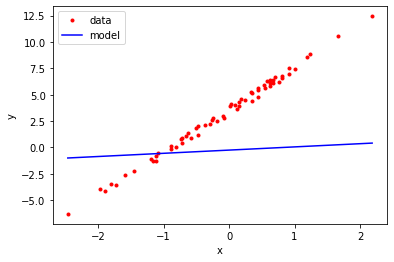

In [ ]:
x_min = x.min()
x_max = x.max()
y_pred_min = alpha + beta*x_min
y_pred_max = alpha + beta*x_max
plt.plot(x,y, 'r.')
plt.plot([x_min,x_max], [y_pred_min,y_pred_max], 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'model'])

Now we want to fit the model to the given data points. In order to do so, we minimize `(y_pred-y)^2` and use PyTorch's auto differentiation to calculate the gradients.

In [ ]:
optimizer = torch.optim.Adam([alpha, beta], lr=1e-2)

for t in range(1000):
    # Forward
    y_pred = x.mul(beta).add(alpha.expand(N))
    loss = (y_pred - y).pow(2).mean()
    # Log
    if t % 20 == 0:
        print(f'Step: {t}: Loss: {loss}')
    
    optimizer.zero_grad()
    # Backward
    loss.backward()
    # Update parameters
    optimizer.step()

Step: 0: Loss: 23.573230743408203
Step: 20: Loss: 21.162458419799805
Step: 40: Loss: 18.918540954589844
Step: 60: Loss: 16.853395462036133
Step: 80: Loss: 14.96367073059082
Step: 100: Loss: 13.241092681884766
Step: 120: Loss: 11.676338195800781
Step: 140: Loss: 10.259969711303711
Step: 160: Loss: 8.982609748840332
Step: 180: Loss: 7.83499813079834
Step: 200: Loss: 6.8080244064331055
Step: 220: Loss: 5.892768859863281
Step: 240: Loss: 5.080532073974609
Step: 260: Loss: 4.36287260055542
Step: 280: Loss: 3.731635093688965
Step: 300: Loss: 3.178990364074707
Step: 320: Loss: 2.69746470451355
Step: 340: Loss: 2.2799575328826904
Step: 360: Loss: 1.9197697639465332
Step: 380: Loss: 1.6106263399124146
Step: 400: Loss: 1.3466777801513672
Step: 420: Loss: 1.122515320777893
Step: 440: Loss: 0.933172345161438
Step: 460: Loss: 0.7741165161132812
Step: 480: Loss: 0.6412473917007446
Step: 500: Loss: 0.5308793783187866
Step: 520: Loss: 0.43972182273864746
Step: 540: Loss: 0.36486348509788513
Step: 560:

Now let's see where our model is at.

In [ ]:
print(f"Optimized Alpha: {alpha}")
print(f"Optimized Beta: {beta}")

print(f"Ground Truth Alpha: {a}")
print(f"Ground Truth Beta: {b}")

The trained model would be something that looks like below.

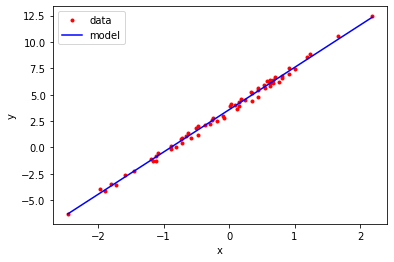

In [ ]:
x_min = x.min()
x_max = x.max()
y_pred_min = alpha + beta*x_min
y_pred_max = alpha + beta*x_max

plt.plot(x,y, 'r.')
plt.plot([x_min,x_max], [y_pred_min,y_pred_max], 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'model'])

What if the correlation between x and y looks like something below? <!-- asking explicit questions-->

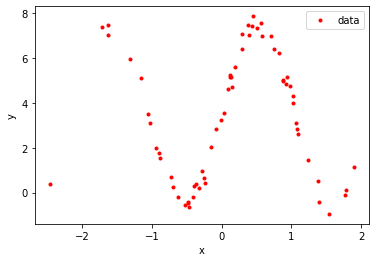

In [ ]:
N = 64
a = 3
b = 4

x = torch.randn(N)
noise = torch.rand(N)

y = a + b*torch.sin(x*3) + noise

plt.plot(x,y, 'r.')
plt.xlabel('x')
plt.ylabel('y')

plt.legend(['data'])

In [ ]:
optimizer = torch.optim.Adam([alpha, beta], lr=1e-2)

for t in range(1000):
    y_pred = x.mul(beta).add(alpha.expand(N))
    
    loss = (y_pred - y).pow(2).mean()
    
    if t % 20 == 0:
        print(f'Step: {t}: Loss: {loss}')
    
    optimizer.zero_grad()   
    
    loss.backward()
    
    optimizer.step()

Step: 0: Loss: 21.57476806640625
Step: 20: Loss: 20.037872314453125
Step: 40: Loss: 18.695796966552734
Step: 60: Loss: 17.522422790527344
Step: 80: Loss: 16.47254180908203
Step: 100: Loss: 15.517010688781738
Step: 120: Loss: 14.64432144165039
Step: 140: Loss: 13.849416732788086
Step: 160: Loss: 13.128034591674805
Step: 180: Loss: 12.475786209106445
Step: 200: Loss: 11.888248443603516
Step: 220: Loss: 11.361026763916016
Step: 240: Loss: 10.889785766601562
Step: 260: Loss: 10.470276832580566
Step: 280: Loss: 10.098369598388672
Step: 300: Loss: 9.770063400268555
Step: 320: Loss: 9.481513977050781
Step: 340: Loss: 9.229043006896973
Step: 360: Loss: 9.009149551391602
Step: 380: Loss: 8.81852912902832
Step: 400: Loss: 8.654075622558594
Step: 420: Loss: 8.512885093688965
Step: 440: Loss: 8.3922700881958
Step: 460: Loss: 8.289751052856445
Step: 480: Loss: 8.203059196472168
Step: 500: Loss: 8.130130767822266
Step: 520: Loss: 8.069101333618164
Step: 540: Loss: 8.018301010131836
Step: 560: Loss: 

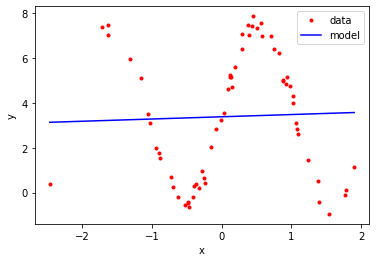

In [ ]:
x_min = x.min()
x_max = x.max()
y_pred_min = alpha + beta*x_min
y_pred_max = alpha + beta*x_max

plt.plot(x,y, 'r.')
plt.plot([x_min,x_max], [y_pred_min,y_pred_max], 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'model'])

How shall we solve this issue?